<a href="https://colab.research.google.com/github/kevinsen-git/TF_Basics/blob/main/01_neural_network_regression_with_tensor_flow_ks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

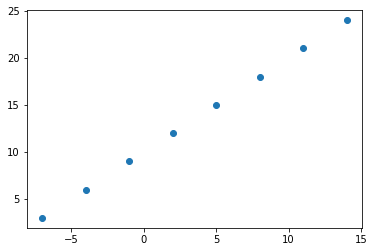

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

# Create dummy features / independant variables
X = tf.constant([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create dummy labels / dependant variable
y = tf.constant([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it 
plt.scatter(X,y)


In [8]:
# Set the random seed to make it reproducable
tf.random.set_seed(42)

# 1. Create a model using the Keras Sequential API 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                          
])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae # Loss function is mean absolute error - this tells the model how bad it is  
              ,optimizer=tf.optimizers.SGD() # Optimizer is stochastic gradient descent - this tells the model how to get better 
              ,metrics=['mae']) # Show us how the model is performing )

# 3. Fit the model
model.fit(X,y,epochs=5) # epochs is the number of times it goes round remodelling the input data sets - i.e. iterations



Epoch 1/5
1/1 [==============================] - 1s 635ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Its pretty horrible !
# Lets run more epochs 5 to 100
model.fit(X,y,epochs=100)

In [ ]:
# Better but still horrible
# Lets change the optimiser 
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['mae']) # Adam optimizer with learning rate of 0.0001 the smaller it is the smaller steps it takes ?
model.fit(X,y,epochs=100)              


In [29]:
# Still around 6 
# So need more hidden layers and more neurons in each 
# The epochs 5 - 100 made a difference
# The optimizer change did not do much 
# The on output layer could not do much with weights
model = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(1)
      ])
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])
#model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["mae"])
model.fit(X,y, epochs=1000)



Epoch 1/1000
1/1 [==============================] - 0s 327ms/step - loss: 13.6790 - mae: 13.6790
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 12.1780 - mae: 12.1780
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 10.6157 - mae: 10.6157
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 8.8464 - mae: 8.8464
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 7.2370 - mae: 7.2370
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 7.1770 - mae: 7.1770
Epoch 7/1000
1/1 [==============================] - 0s 13ms/step - loss: 7.1162 - mae: 7.1162
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 7.0908 - mae: 7.0908
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 8.1752 - mae: 8.1752
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 7.2720 - mae: 7.2720
Epoch 11/1000
1/1 [==============================] - 0s 5ms

In [ ]:
# Still not very good - around 4
# Lets add activation of relu 
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),    
    tf.keras.layers.Dense(100,activation="relu"),    
    tf.keras.layers.Dense(1)                           
])
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(lr=0.0001),metrics=["mae"])
model.fit(X,y,epochs=100)
model.predict([17.0])
# 0s 17ms/step - loss: 0.0147 - mae: 0.0147
# So mae is 0.01
# But do we have over fitting with 7 hidden layers and one output layer ??


In [50]:
# Leraning rate is a major contributor NORMALLY 
model=tf.keras.Sequential([
  tf.keras.layers.Dense(150,activation="relu"),
  tf.keras.layers.Dense(1)                           
])

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])
model.fit(X, y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 325ms/step - loss: 13.6160 - mae: 13.6160
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.6176 - mae: 12.6176
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.6580 - mae: 11.6580
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9852 - mae: 10.9852
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.3123 - mae: 10.3123
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6252 - mae: 9.6252
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 8.9233 - mae: 8.9233
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1992 - mae: 8.1992
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 7.4469 - mae: 7.4469
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.6674 - mae: 6.6674
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - l

In [51]:
# Wow - so one hidden layer with 100 neurons + lr of 0.01 gives 0.25 !!!
model.predict([17.00]) 

array([[27.285477]], dtype=float32)